# Table of Contents
* **Introduction**  
* **Programmatically Collecting Data from Kaggle Website**
* **Data Cleaning and Manipulation**
* **Exploratory Data Analysis**
* **Management Practice Analysis**
* **Performance Improvement Plan (PIP) Efficacy Analysis**
* **Diversity and Equity Analysis**

# Introduction

**In this notebook, I analyze a fictitious HR dataset available on Kaggle to answer several critical business questions**

* How do and job performance, engagement levels, and satisfaction levels vary for employees under different managers? 
* How effective are the company's Performance Improvement Plans (PIP's)? 
* What is the overall diversity profile of the company? Which recruiting sources promote diversity? And is compensation at the company equitable between identity groups? 

**Before beginning to answer these questions, I have to collect the data; clean it and manipulate it; and do some exploratory analysis which will reveal other insights about the company's workforce**

Dataset Link: https://www.kaggle.com/datasets/rhuebner/human-resources-data-set/data

# Programmatically Collecting Data from Kaggle Website 

In [1]:
# Importing packages and customizing display options

import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile 
import kaggle
from datetime import datetime, timedelta
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import MultiComparison
import pingouin as pg

pd.set_option('display.max_columns', None)
pd.set_option('mode.chained_assignment', None)

In [2]:
# Downloading the dataset from Kaggle using Kaggle API

!kaggle datasets download -d rhuebner/human-resources-data-set

  0%|                                               | 0.00/16.6k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 16.6k/16.6k [00:00<00:00, 6.76MB/s]


In [3]:
# Extracting the file from the downloaded zip file

zipfile_name = 'human-resources-data-set.zip'
with zipfile.ZipFile(zipfile_name, 'r') as file:
    file.extractall()

In [4]:
# Reading the CSV file into a Pandas dataframe and having a look the first few rows 

data = pd.read_csv('HRDataset_v14.csv')

data.sort_values('Employee_Name').head(5)

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,07/10/83,M,Single,US Citizen,No,White,7/5/2011,NaN,N/A-StillEmployed,Active,Production,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,05/05/75,M,Married,US Citizen,No,White,3/30/2015,6/16/2016,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,09/19/88,F,Married,US Citizen,No,White,7/5/2011,9/24/2012,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,09/27/88,F,Married,US Citizen,No,White,1/7/2008,NaN,N/A-StillEmployed,Active,Production,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,09/08/89,F,Divorced,US Citizen,No,White,7/11/2011,9/6/2016,return to school,Voluntarily Terminated,Production,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


# Data Cleaning and Manipulation

**Let's begin by inspecting the data types and null values**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

**None of the date columns are not in datetime format, so they will have to be converted**

In [6]:
date_columns = ['DOB', 'DateofHire', 'DateofTermination', 'LastPerformanceReview_Date']

data[date_columns] = data[date_columns].apply(pd.to_datetime)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Employee_Name               311 non-null    object        
 1   EmpID                       311 non-null    int64         
 2   MarriedID                   311 non-null    int64         
 3   MaritalStatusID             311 non-null    int64         
 4   GenderID                    311 non-null    int64         
 5   EmpStatusID                 311 non-null    int64         
 6   DeptID                      311 non-null    int64         
 7   PerfScoreID                 311 non-null    int64         
 8   FromDiversityJobFairID      311 non-null    int64         
 9   Salary                      311 non-null    int64         
 10  Termd                       311 non-null    int64         
 11  PositionID                  311 non-null    int64         

**We can see that most columns have no null values, except for 'DateofTermination', 'TermReason', and 'ManagerID'**  

**There are obviously null values for 'DateofTermination' and 'TermReason' because not all the employees in the dataset were terminated**  

**But it's not clear why there are some null values for 'ManagerID', especially when there are no null values for 'ManagerName'. I'll have to explore this a bit**   

**Also, the 'ManagerID' column is a float right now and would be better off as an integer, since it's just ID's which don't contain decimals. However, there are null values for 'ManagerID', so it cannot be converted to integer type** 

**Let's look at the rows that have null values for the 'ManagerID' column**

In [7]:
data[data['ManagerID'].isna()]

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
19,"Becker, Scott",10277,0,0,1,3,5,3,0,53250,0,19,Production Technician I,MA,2452,1979-04-06,M,Single,US Citizen,No,Asian,2013-07-08,NaT,N/A-StillEmployed,Active,Production,Webster Butler,NaN,LinkedIn,Fully Meets,4.20,4,0,2019-01-11,0,13
30,"Buccheri, Joseph",10184,0,0,1,1,5,3,0,65288,0,20,Production Technician II,MA,1013,1983-07-28,M,Single,US Citizen,No,White,2014-09-29,NaT,N/A-StillEmployed,Active,Production,Webster Butler,NaN,Google Search,Fully Meets,3.19,3,0,2019-02-01,0,9
44,"Chang, Donovan E",10154,0,0,1,1,5,3,0,60380,0,19,Production Technician I,MA,1845,1983-08-24,M,Single,US Citizen,No,White,2013-07-08,NaT,N/A-StillEmployed,Active,Production,Webster Butler,NaN,LinkedIn,Fully Meets,3.80,5,0,2019-01-14,0,4
88,"Fancett, Nicole",10136,0,0,0,1,5,3,0,65902,0,20,Production Technician II,MA,2324,1987-09-27,F,Single,US Citizen,No,Black or African American,2014-02-17,NaT,N/A-StillEmployed,Active,Production,Webster Butler,NaN,LinkedIn,Fully Meets,4.00,4,0,2019-01-07,0,7
135,"Hutter, Rosalie",10214,0,3,0,2,5,3,0,64995,0,20,Production Technician II,MA,2351,1992-05-07,F,Separated,US Citizen,No,White,2015-06-05,NaT,N/A-StillEmployed,Active,Production,Webster Butler,NaN,Indeed,Fully Meets,4.50,3,0,2019-02-14,0,6
177,"Manchester, Robyn",10077,1,1,0,2,5,3,0,62385,0,20,Production Technician II,MA,2324,1976-08-25,F,Married,US Citizen,No,White,2016-05-11,NaT,N/A-StillEmployed,Active,Production,Webster Butler,NaN,LinkedIn,Fully Meets,5.00,3,0,2019-01-21,0,4
232,"Rivera, Haley",10011,1,1,0,1,5,4,0,46738,0,19,Production Technician I,MA,2171,1973-01-12,F,Married,US Citizen,No,Asian,2011-11-28,NaT,N/A-StillEmployed,Active,Production,Webster Butler,NaN,Google Search,Exceeds,4.36,5,0,2019-02-11,0,16
251,"Sewkumar, Nori",10071,0,0,0,3,5,3,0,50923,0,19,Production Technician I,MA,2191,1975-03-10,F,Single,US Citizen,No,Asian,2013-09-30,NaT,N/A-StillEmployed,Active,Production,Webster Butler,NaN,Google Search,Fully Meets,5.00,5,0,2019-02-06,0,14


**The thing all these rows have in common is that the 'ManagerName' is Webster Butler** 

**Let's find Webster Butler's 'EmpID' and use that value to fill in these NA's**

In [8]:
data[data['Employee_Name'].str.contains('Butler', case=False, na=False)]

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences


**It looks like Webster Butler is not listed in the dataset as an employee since the previous line of code returned 0 rows**  

**Let's look at all the rows where 'ManagerName' is Webster Butler, since there may be rows where 'ManagerName' is Webster Butler and there is a non-null value for 'ManagerID'**

In [9]:
data[data['ManagerName'] == 'Webster Butler']

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,1989-09-08,F,Divorced,US Citizen,No,White,2011-07-11,2016-09-06,return to school,Voluntarily Terminated,Production,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2016-02-01,0,2
19,"Becker, Scott",10277,0,0,1,3,5,3,0,53250,0,19,Production Technician I,MA,2452,1979-04-06,M,Single,US Citizen,No,Asian,2013-07-08,NaT,N/A-StillEmployed,Active,Production,Webster Butler,NaN,LinkedIn,Fully Meets,4.20,4,0,2019-01-11,0,13
30,"Buccheri, Joseph",10184,0,0,1,1,5,3,0,65288,0,20,Production Technician II,MA,1013,1983-07-28,M,Single,US Citizen,No,White,2014-09-29,NaT,N/A-StillEmployed,Active,Production,Webster Butler,NaN,Google Search,Fully Meets,3.19,3,0,2019-02-01,0,9
44,"Chang, Donovan E",10154,0,0,1,1,5,3,0,60380,0,19,Production Technician I,MA,1845,1983-08-24,M,Single,US Citizen,No,White,2013-07-08,NaT,N/A-StillEmployed,Active,Production,Webster Butler,NaN,LinkedIn,Fully Meets,3.80,5,0,2019-01-14,0,4
65,"DeGweck, James",10070,1,1,1,5,5,3,0,55722,1,19,Production Technician I,MA,1810,1977-10-31,M,Married,US Citizen,No,White,2011-05-16,2016-06-08,unhappy,Voluntarily Terminated,Production,Webster Butler,39.0,Indeed,Fully Meets,5.00,4,0,2016-04-02,0,14
88,"Fancett, Nicole",10136,0,0,0,1,5,3,0,65902,0,20,Production Technician II,MA,2324,1987-09-27,F,Single,US Citizen,No,Black or African American,2014-02-17,NaT,N/A-StillEmployed,Active,Production,Webster Butler,NaN,LinkedIn,Fully Meets,4.00,4,0,2019-01-07,0,7
89,"Ferguson, Susan",10189,1,1,0,5,5,3,0,57748,1,19,Production Technician I,MA,2176,2055-04-14,F,Married,US Citizen,No,White,2011-11-07,2016-05-17,military,Voluntarily Terminated,Production,Webster Butler,39.0,Google Search,Fully Meets,3.13,3,0,2016-02-04,0,16
105,"Gilles, Alex",10283,1,1,1,5,5,2,1,54933,1,19,Production Technician I,MA,2062,1974-08-09,M,Married,US Citizen,No,Black or African American,2012-04-02,2015-06-25,military,Voluntarily Terminated,Production,Webster Butler,39.0,Diversity Job Fair,Needs Improvement,3.97,4,0,2015-01-20,3,15
124,"Harrington, Christie",10097,0,0,0,5,5,3,0,52177,1,19,Production Technician I,MA,2324,2052-08-18,F,Single,US Citizen,No,White,2012-01-09,2015-12-15,retiring,Voluntarily Terminated,Production,Webster Butler,39.0,CareerBuilder,Fully Meets,4.64,4,0,2015-05-02,0,8
135,"Hutter, Rosalie",10214,0,3,0,2,5,3,0,64995,0,20,Production Technician II,MA,2351,1992-05-07,F,Separated,US Citizen,No,White,2015-06-05,NaT,N/A-StillEmployed,Active,Production,Webster Butler,NaN,Indeed,Fully Meets,4.50,3,0,2019-02-14,0,6


**It looks like Webster Butler's manager ID is listed for only employees that have left the company**  

**Let's fill in the null values for Webster Butler's remaining employees**

In [10]:
butler_id = data[data['ManagerName'] == 'Webster Butler']['ManagerID'].values[0]

data.loc[data['ManagerID'].isna(), 'ManagerID'] = butler_id

data[data['ManagerName'] == 'Webster Butler']

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,1989-09-08,F,Divorced,US Citizen,No,White,2011-07-11,2016-09-06,return to school,Voluntarily Terminated,Production,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2016-02-01,0,2
19,"Becker, Scott",10277,0,0,1,3,5,3,0,53250,0,19,Production Technician I,MA,2452,1979-04-06,M,Single,US Citizen,No,Asian,2013-07-08,NaT,N/A-StillEmployed,Active,Production,Webster Butler,39.0,LinkedIn,Fully Meets,4.20,4,0,2019-01-11,0,13
30,"Buccheri, Joseph",10184,0,0,1,1,5,3,0,65288,0,20,Production Technician II,MA,1013,1983-07-28,M,Single,US Citizen,No,White,2014-09-29,NaT,N/A-StillEmployed,Active,Production,Webster Butler,39.0,Google Search,Fully Meets,3.19,3,0,2019-02-01,0,9
44,"Chang, Donovan E",10154,0,0,1,1,5,3,0,60380,0,19,Production Technician I,MA,1845,1983-08-24,M,Single,US Citizen,No,White,2013-07-08,NaT,N/A-StillEmployed,Active,Production,Webster Butler,39.0,LinkedIn,Fully Meets,3.80,5,0,2019-01-14,0,4
65,"DeGweck, James",10070,1,1,1,5,5,3,0,55722,1,19,Production Technician I,MA,1810,1977-10-31,M,Married,US Citizen,No,White,2011-05-16,2016-06-08,unhappy,Voluntarily Terminated,Production,Webster Butler,39.0,Indeed,Fully Meets,5.00,4,0,2016-04-02,0,14
88,"Fancett, Nicole",10136,0,0,0,1,5,3,0,65902,0,20,Production Technician II,MA,2324,1987-09-27,F,Single,US Citizen,No,Black or African American,2014-02-17,NaT,N/A-StillEmployed,Active,Production,Webster Butler,39.0,LinkedIn,Fully Meets,4.00,4,0,2019-01-07,0,7
89,"Ferguson, Susan",10189,1,1,0,5,5,3,0,57748,1,19,Production Technician I,MA,2176,2055-04-14,F,Married,US Citizen,No,White,2011-11-07,2016-05-17,military,Voluntarily Terminated,Production,Webster Butler,39.0,Google Search,Fully Meets,3.13,3,0,2016-02-04,0,16
105,"Gilles, Alex",10283,1,1,1,5,5,2,1,54933,1,19,Production Technician I,MA,2062,1974-08-09,M,Married,US Citizen,No,Black or African American,2012-04-02,2015-06-25,military,Voluntarily Terminated,Production,Webster Butler,39.0,Diversity Job Fair,Needs Improvement,3.97,4,0,2015-01-20,3,15
124,"Harrington, Christie",10097,0,0,0,5,5,3,0,52177,1,19,Production Technician I,MA,2324,2052-08-18,F,Single,US Citizen,No,White,2012-01-09,2015-12-15,retiring,Voluntarily Terminated,Production,Webster Butler,39.0,CareerBuilder,Fully Meets,4.64,4,0,2015-05-02,0,8
135,"Hutter, Rosalie",10214,0,3,0,2,5,3,0,64995,0,20,Production Technician II,MA,2351,1992-05-07,F,Separated,US Citizen,No,White,2015-06-05,NaT,N/A-StillEmployed,Active,Production,Webster Butler,39.0,Indeed,Fully Meets,4.50,3,0,2019-02-14,0,6


**We can now also convert the 'ManagerID' column from a float to an integer**

In [11]:
data['ManagerID'] = data['ManagerID'].astype(int)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Employee_Name               311 non-null    object        
 1   EmpID                       311 non-null    int64         
 2   MarriedID                   311 non-null    int64         
 3   MaritalStatusID             311 non-null    int64         
 4   GenderID                    311 non-null    int64         
 5   EmpStatusID                 311 non-null    int64         
 6   DeptID                      311 non-null    int64         
 7   PerfScoreID                 311 non-null    int64         
 8   FromDiversityJobFairID      311 non-null    int64         
 9   Salary                      311 non-null    int64         
 10  Termd                       311 non-null    int64         
 11  PositionID                  311 non-null    int64         

**Now that our data types are correct, we can remove leading and trailing whitespace from the text columns so that identical values are not seen by the computer as different because of differences in whitespace**

In [12]:
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = data[column].str.strip()

**I noticed before that there were 'N/A—StillEmployed' string values in the 'TermReason' column** 

**These would be better off as null values**  

**But before replacing them, let's look at all the unique values for this column to make sure there's no other adjustments that need to be made**

In [13]:
data['TermReason'].value_counts()

N/A-StillEmployed                   207
Another position                     20
unhappy                              14
more money                           11
career change                         9
hours                                 8
attendance                            7
return to school                      5
relocation out of area                5
no-call, no-show                      4
military                              4
retiring                              4
performance                           4
maternity leave - did not return      3
medical issues                        3
Learned that he is a gangster         1
Fatal attraction                      1
gross misconduct                      1
Name: TermReason, dtype: int64


**OK, looks like we're set to switch those 'N/A—StillEmployed' values to null values**


In [14]:
data['TermReason'] = data['TermReason'].replace('N/A-StillEmployed', np.nan)

data['TermReason'].value_counts()

Another position                    20
unhappy                             14
more money                          11
career change                        9
hours                                8
attendance                           7
return to school                     5
relocation out of area               5
no-call, no-show                     4
military                             4
retiring                             4
performance                          4
maternity leave - did not return     3
medical issues                       3
Learned that he is a gangster        1
Fatal attraction                     1
gross misconduct                     1
Name: TermReason, dtype: int64

**I also want to recode the values in the 'HispanicLatino' column, as I don't like how there are 'Yes' and 'No' values**  

**It doesn't look consistent with the way other true/false columns are encoded, and it wouldn't look good on a bar chart** 

**Let's look at the value counts for the column**

In [15]:
data['HispanicLatino'].value_counts()

No     282
Yes     27
no       1
yes      1
Name: HispanicLatino, dtype: int64

**Recoding now will also be a good opportunity to make sure that differences in capitalization aren't registered as different responses**

In [16]:
mapping = {'yes': 'Hispanic / Latino', 'no': 'Not Hispanic / Latino'}

data['HispanicLatino'] = data['HispanicLatino'].str.lower().map(mapping)

data['HispanicLatino'].value_counts()

Not Hispanic / Latino    283
Hispanic / Latino         28
Name: HispanicLatino, dtype: int64

**Another thing to investigate is whether there are duplicate rows**  

**If there are, we need to drop them**

In [17]:
data[data.duplicated(keep=False)]

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences


**We can see that there are no duplicate rows in the dataset since the previous line of code returned 0 rows**  

**Lastly, I'd like to create an age column, since right now we only have employees' date of birth**

In [18]:
current_date = datetime.now()

data['Age'] = (current_date - data['DOB']).dt.days / 365.25

data['Age'] = data['Age'].astype(int)

data.head(5)

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,Age
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,1983-07-10,M,Single,US Citizen,Not Hispanic / Latino,White,2011-07-05,NaT,NaN,Active,Production,Michael Albert,22,LinkedIn,Exceeds,4.60,5,0,2019-01-17,0,1,40
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,1975-05-05,M,Married,US Citizen,Not Hispanic / Latino,White,2015-03-30,2016-06-16,career change,Voluntarily Terminated,IT/IS,Simon Roup,4,Indeed,Fully Meets,4.96,3,6,2016-02-24,0,17,48
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,1988-09-19,F,Married,US Citizen,Not Hispanic / Latino,White,2011-07-05,2012-09-24,hours,Voluntarily Terminated,Production,Kissy Sullivan,20,LinkedIn,Fully Meets,3.02,3,0,2012-05-15,0,3,35
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,1988-09-27,F,Married,US Citizen,Not Hispanic / Latino,White,2008-01-07,NaT,NaN,Active,Production,Elijiah Gray,16,Indeed,Fully Meets,4.84,5,0,2019-01-03,0,15,35
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,1989-09-08,F,Divorced,US Citizen,Not Hispanic / Latino,White,2011-07-11,2016-09-06,return to school,Voluntarily Terminated,Production,Webster Butler,39,Google Search,Fully Meets,5.00,4,0,2016-02-01,0,2,34


**At first it appears that we've successfully created an age column, but let's take a look at the distribution of age within the company**

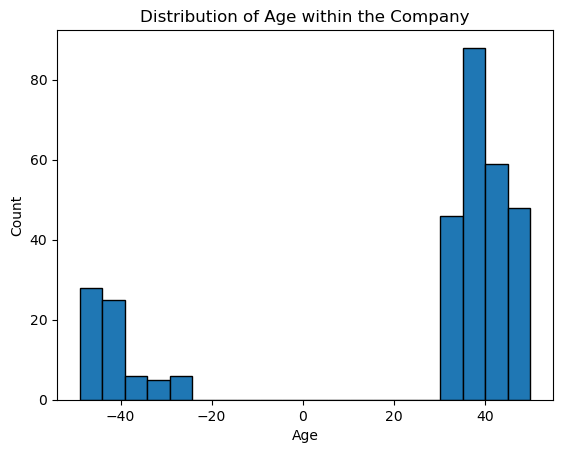

In [19]:
plt.hist(data['Age'], bins=20, edgecolor='black')

plt.title('Distribution of Age within the Company')
plt.ylabel('Count')
plt.xlabel('Age')
plt.show()

**We can see that a significant portion of the company have a negative age**

**Let's look at some of the rows where age is negative**

In [20]:
data[data['Age'] < 0].head(5)

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,Age
8,"Bachiochi, Linda",10114,0,0,0,3,5,3,1,47837,0,19,Production Technician I,MA,1902,2070-02-11,F,Single,US Citizen,Not Hispanic / Latino,Black or African American,2009-07-06,NaT,NaN,Active,Production,Brannon Miller,12,Diversity Job Fair,Fully Meets,4.46,3,0,2019-01-25,0,4,-46
16,"Beak, Kimberly",10023,1,1,0,2,5,4,0,70131,0,20,Production Technician II,MA,2145,2066-04-17,F,Married,US Citizen,Not Hispanic / Latino,White,2016-07-21,NaT,NaN,Active,Production,Kelley Spirea,18,Employee Referral,Exceeds,4.40,3,0,2019-01-14,0,16,-42
17,"Beatrice, Courtney",10055,0,0,0,1,5,3,0,59026,0,19,Production Technician I,MA,1915,2070-10-27,F,Single,Eligible NonCitizen,Not Hispanic / Latino,White,2011-04-04,NaT,NaN,Active,Production,Elijiah Gray,16,Google Search,Fully Meets,5.00,5,0,2019-01-14,0,12,-46
20,"Bernstein, Sean",10046,0,0,1,1,5,3,0,51044,0,19,Production Technician I,MA,2072,2070-12-22,M,Single,US Citizen,Hispanic / Latino,White,2012-04-02,NaT,NaN,Active,Production,Amy Dunn,11,Google Search,Fully Meets,5.00,3,0,2019-01-14,0,13,-47
21,"Biden, Lowan M",10226,0,2,0,1,5,3,0,64919,0,19,Production Technician I,MA,2027,2058-12-27,F,Divorced,US Citizen,Not Hispanic / Latino,Asian,2013-08-19,NaT,NaN,Active,Production,Ketsia Liebig,19,Indeed,Fully Meets,4.20,3,0,2019-01-10,0,2,-35


**We can see that the DOB for these employees is clearly incorrect**

**The most likely explanation is that there was some data entry error that resulted in DOB's being listed as 100 later than they actually are**

**For example, a DOB in 1970 would be incorrectly listed as being in 2070**

**Let's try making this correction in these rows, then comparing the age distribution for corrected rows with the age distribution for rows where age was positive from the start**

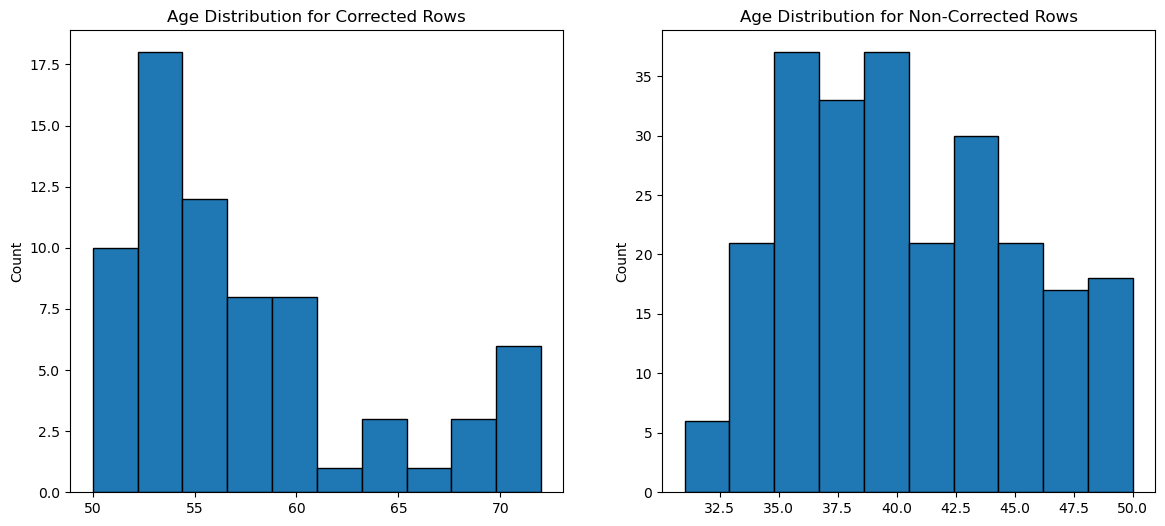

In [21]:
neg_age = data[data['Age'] < 0].copy()
pos_age = data[data['Age'] > 0].copy()

neg_age['DOB'] = neg_age['DOB'] - timedelta(days=365.25 * 100)

neg_age['Age'] = (current_date - neg_age['DOB']).dt.days / 365.25
neg_age['Age'] = neg_age['Age'].astype(int)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

neg_age['Age'].hist(bins=10, ax=axes[0], edgecolor='k')
axes[0].set_title('Age Distribution for Corrected Rows')
axes[0].set_ylabel('Count')
axes[0].grid(False)

pos_age['Age'].hist(bins=10, ax=axes[1], edgecolor='k')
axes[1].set_title('Age Distribution for Non-Corrected Rows')
axes[1].set_ylabel('Count')
axes[1].grid(False)

**It looks like the DOB's for rows where age was negative were actually 80 years too far in the future, not 100, since the left distribution is similar to the right distribution, but shifted 20 years to the right**

**Another thing that makes me think that the DOB's were less than 100 years off is the fact that in the corrected distribution, many of the employees are beyond retirement age**

**So now I'll correct the DOB's for rows where age was negative to by subtracting 80 years, then visualize the final age distribution to make sure everything looks right**

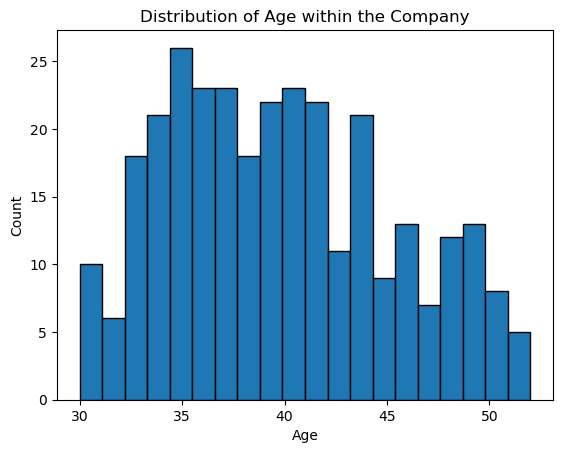

In [22]:
neg_age = data[data['Age'] < 0].copy()
pos_age = data[data['Age'] > 0].copy()

neg_age['DOB'] = neg_age['DOB'] - timedelta(days=365.25 * 80)

neg_age['Age'] = (current_date - neg_age['DOB']).dt.days / 365.25
neg_age['Age'] = neg_age['Age'].astype(int)

data = pd.concat([neg_age, pos_age], ignore_index=True)

plt.hist(data['Age'], bins=20, edgecolor='black')

plt.title('Distribution of Age within the Company')
plt.ylabel('Count')
plt.xlabel('Age')
plt.show()

# Exploratory Data Analysis 

**Now that our dataset is cleaned, we can start doing some EDA, starting with some descriptive statistics of numerical columns**

**Something we need to be aware of is that many of our numerical columns don't actually contain quantitative values, like ID numbers and numerical encodings of categorical variables**

**It wouldn't make sense to get descriptive statistics for these columns, therefore we'll gather the descriptive statistics only for strictly quantiative columns** 

In [23]:
quant_columns = data[['Salary', 'PerfScoreID', 'EngagementSurvey', 'EmpSatisfaction', 
                      'SpecialProjectsCount', 'DaysLateLast30', 'Absences']]
quant_columns.describe().round(2)

,Salary,PerfScoreID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
count,311.00,311.00,311.00,311.00,311.00,311.00,311.00
mean,69020.68,2.98,4.11,3.89,1.22,0.41,10.24
std,25156.64,0.59,0.79,0.91,2.35,1.29,5.85
min,45046.00,1.00,1.12,1.00,0.00,0.00,1.00
25%,55501.50,3.00,3.69,3.00,0.00,0.00,5.00
50%,62810.00,3.00,4.28,4.00,0.00,0.00,10.00
75%,72036.00,3.00,4.70,5.00,0.00,0.00,15.00
max,250000.00,4.00,5.00,5.00,8.00,6.00,20.00


**We can also visualize the distribution of each quantitative column through histograms**

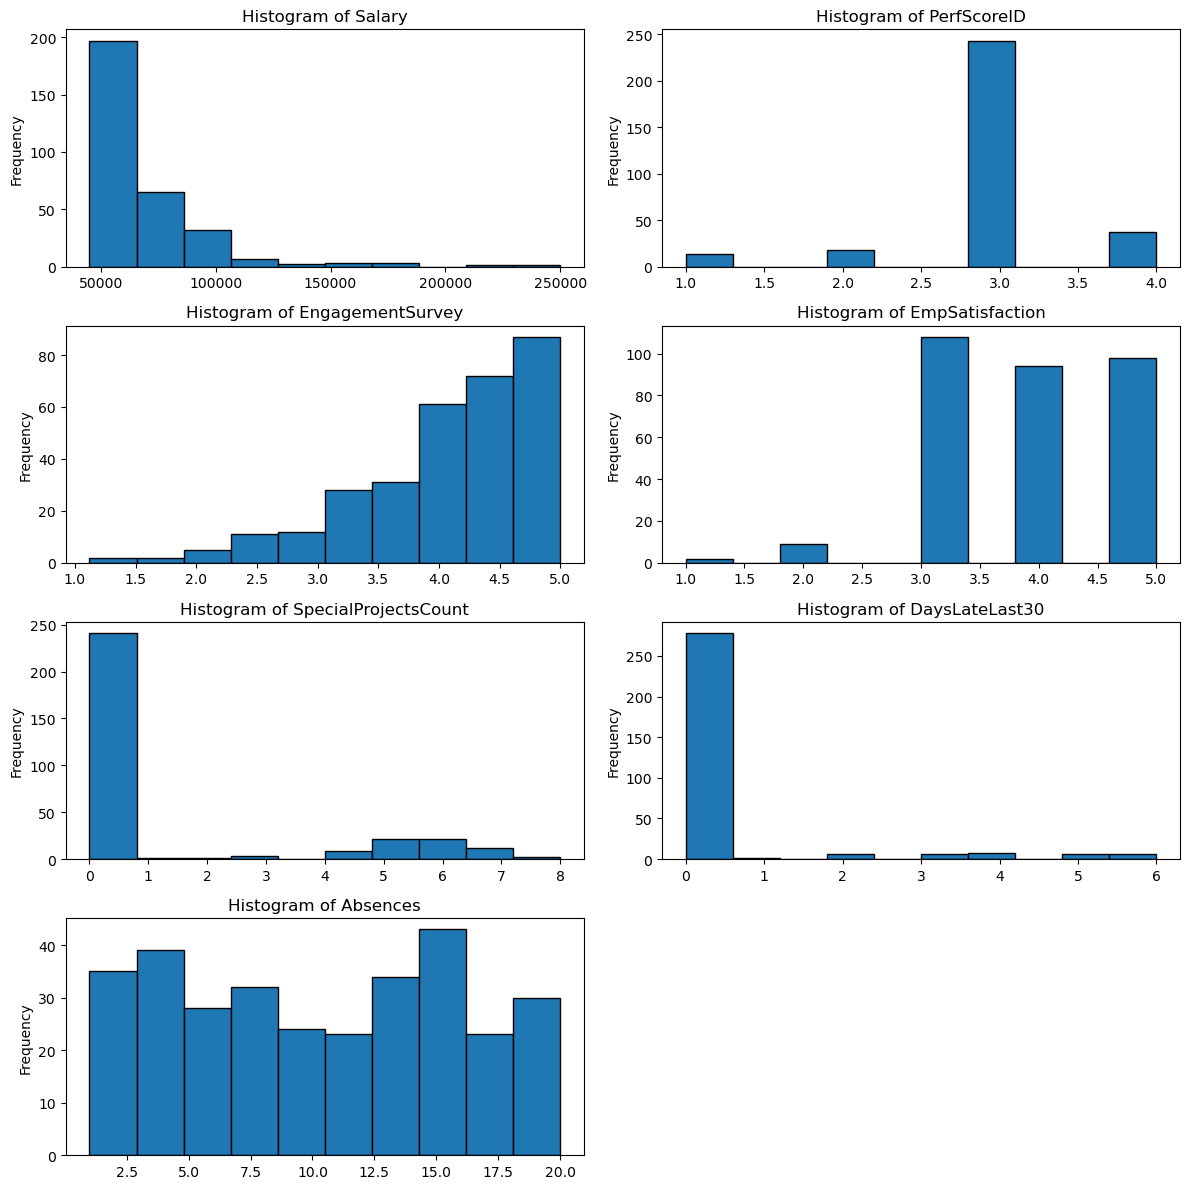

In [24]:
# Creating a 4x2 grid of subplots, since we are going to make 7 histograms and we want 2 per row 
fig, axes = plt.subplots(4, 2, figsize=(12, 12))

# Iterating through the list of quantitative columns to create a histogram for each one
for i, column in enumerate(quant_columns):
    ax = axes[i // 2, i % 2] 
    
    # Creating the histogram
    quant_columns[column].hist(bins=10, ax=ax, edgecolor='k')
    
    # Customizing the visualization
    ax.set_title(f'Histogram of {column}')
    ax.set_ylabel('Frequency')
    ax.grid(False)
    
# Deleting the last subplot since it's empty 
fig.delaxes(axes[3,1])

plt.tight_layout()
plt.show()

**Insights:**

1) The vast majority of employees make between 50,000 and 100,000 USD per year

2) The vast majority of employees received a 3 out of 4 ('Fully Meets') on their performance evaluation. The second most common rating was a 4 out of 4 ('Exceeds'), followed by 2 out of 4 ('Needs Improvement'), then 1 out of 4 ('Performance Improvement Plan'). This indicates that employees are generally performing as they are expected to or better

3) The majority of employees have very high engagement scores. Remarkably, the higher the engagement score, the more common it is. This implies that the company is doing a good job making sure employees are engaged

4) The vast majority of employees have satisfaction ratings between 3 and 5, with very few scoring 1 or 2. There are roughly equal numbers of employees scoring 3, 4, and 5. However, the most common satisfaction rating was 3. This means that the company may be able to do more to promote employee satisfaction

5) The vast majority of employees take on 0 special projects. Those who have do take on special projects tend to take on between 4 and 7

6) The vast majority of employees have not been late in the past 30 days 

7) The spread in the number of days employees have been absent is large (between 1 and 20) and even 

**I can also create a heatmap to show correlations between these features**

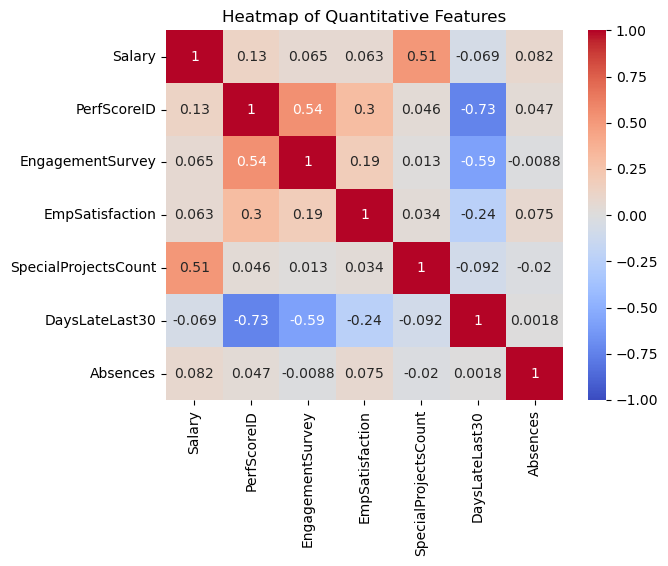

In [25]:
corr = quant_columns.corr()

heatmap = sns.heatmap(corr, annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1)

plt.title('Heatmap of Quantitative Features')

plt.show()

**Very weak correlations:**

1) There is a very weak positive correlation between 'PerfScoreID' and 'Salary'. The likely explanation for this is that while performance plays a role in determining salary, other factors like department, role, and seniority are also in play

2) There is a very weak positive correlation between 'EnagementSurvey' and 'EmpSatisfaction'. This shows that more engaged employees tend to also be more satisfied, but that engagement and satisfaction are distinct phenomena

**Weak correlations:**

1) There is a weak positive correlation between 'EmpSatisfaction' and 'PerfScoreID'. This means that more satisfied employees tend to be higher performing 

2) There is a weak negative correlation between 'EmpSatisfaction' and 'DaysLateLast30'. This shows that employees who are late to work more frequently tend to be less satisfied

**Moderate correlations:**

1) There is a moderate positive correlation between 'EngagementSurvey' and 'PerfScoreID'. This means that more engaged employees tend to be higher performing

2) There is a moderate positive correlation between 'SpecialProjectsCount' and 'Salary'. This shows that typically, the more special projects an employee takes on, the better they are compensated. This could be because they are awarded bonuses for the special projects. It could also be because the more competent employees are compensated better and also assigned to more special projects

3) There is a moderate negative correlation between 'EngagementSurvey' and 'DaysLateLast30'. This shows that employees who are late to work more frequently tend to be less engaged 

**Strong correlations:**

1) There is a strong negative correlation between 'PerfScoreID' and 'DaysLateLast30'. This shows that employees who are late to work more frequently tend to be poorer performers  

**Now we can move on to exploring the categorical columns in our dataset**  

**I'd like to create visualizations for all the categorical columns, but some have so many unique values that the resulting bar charts would look bad and be difficult to interpret**  

**For these columns I will simply print out their value counts**

In [26]:
cat_columns_print = ['TermReason', 'Position', 'State']

for column in cat_columns_print: 
    value_counts_variable = f'{column}_ValueCounts'
    globals()[value_counts_variable] = data[column].value_counts().to_string()
    print(f'{column} Value Counts: \n\n{globals()[value_counts_variable]}\n')

TermReason Value Counts: 

Another position                    20
unhappy                             14
more money                          11
career change                        9
hours                                8
attendance                           7
relocation out of area               5
return to school                     5
performance                          4
no-call, no-show                     4
military                             4
retiring                             4
maternity leave - did not return     3
medical issues                       3
Learned that he is a gangster        1
Fatal attraction                     1
gross misconduct                     1

Position Value Counts: 

Production Technician I         137
Production Technician II         57
Area Sales Manager               27
Production Manager               14
Software Engineer                10
IT Support                        8
Data Analyst                      8
Sr. Network Engineer            

**Insights:**  

1) The most common reasons that employees leave the company are because they had another job offer; they were unhappy at the company; or they were offered more money elsewhere

2) The majority (> 60%) of employees are Product Technicians (either level 1 or 2) 

3) Nearly all employees reside in Massachusetts

**Now I can visualize the rest of the categorical columns** 

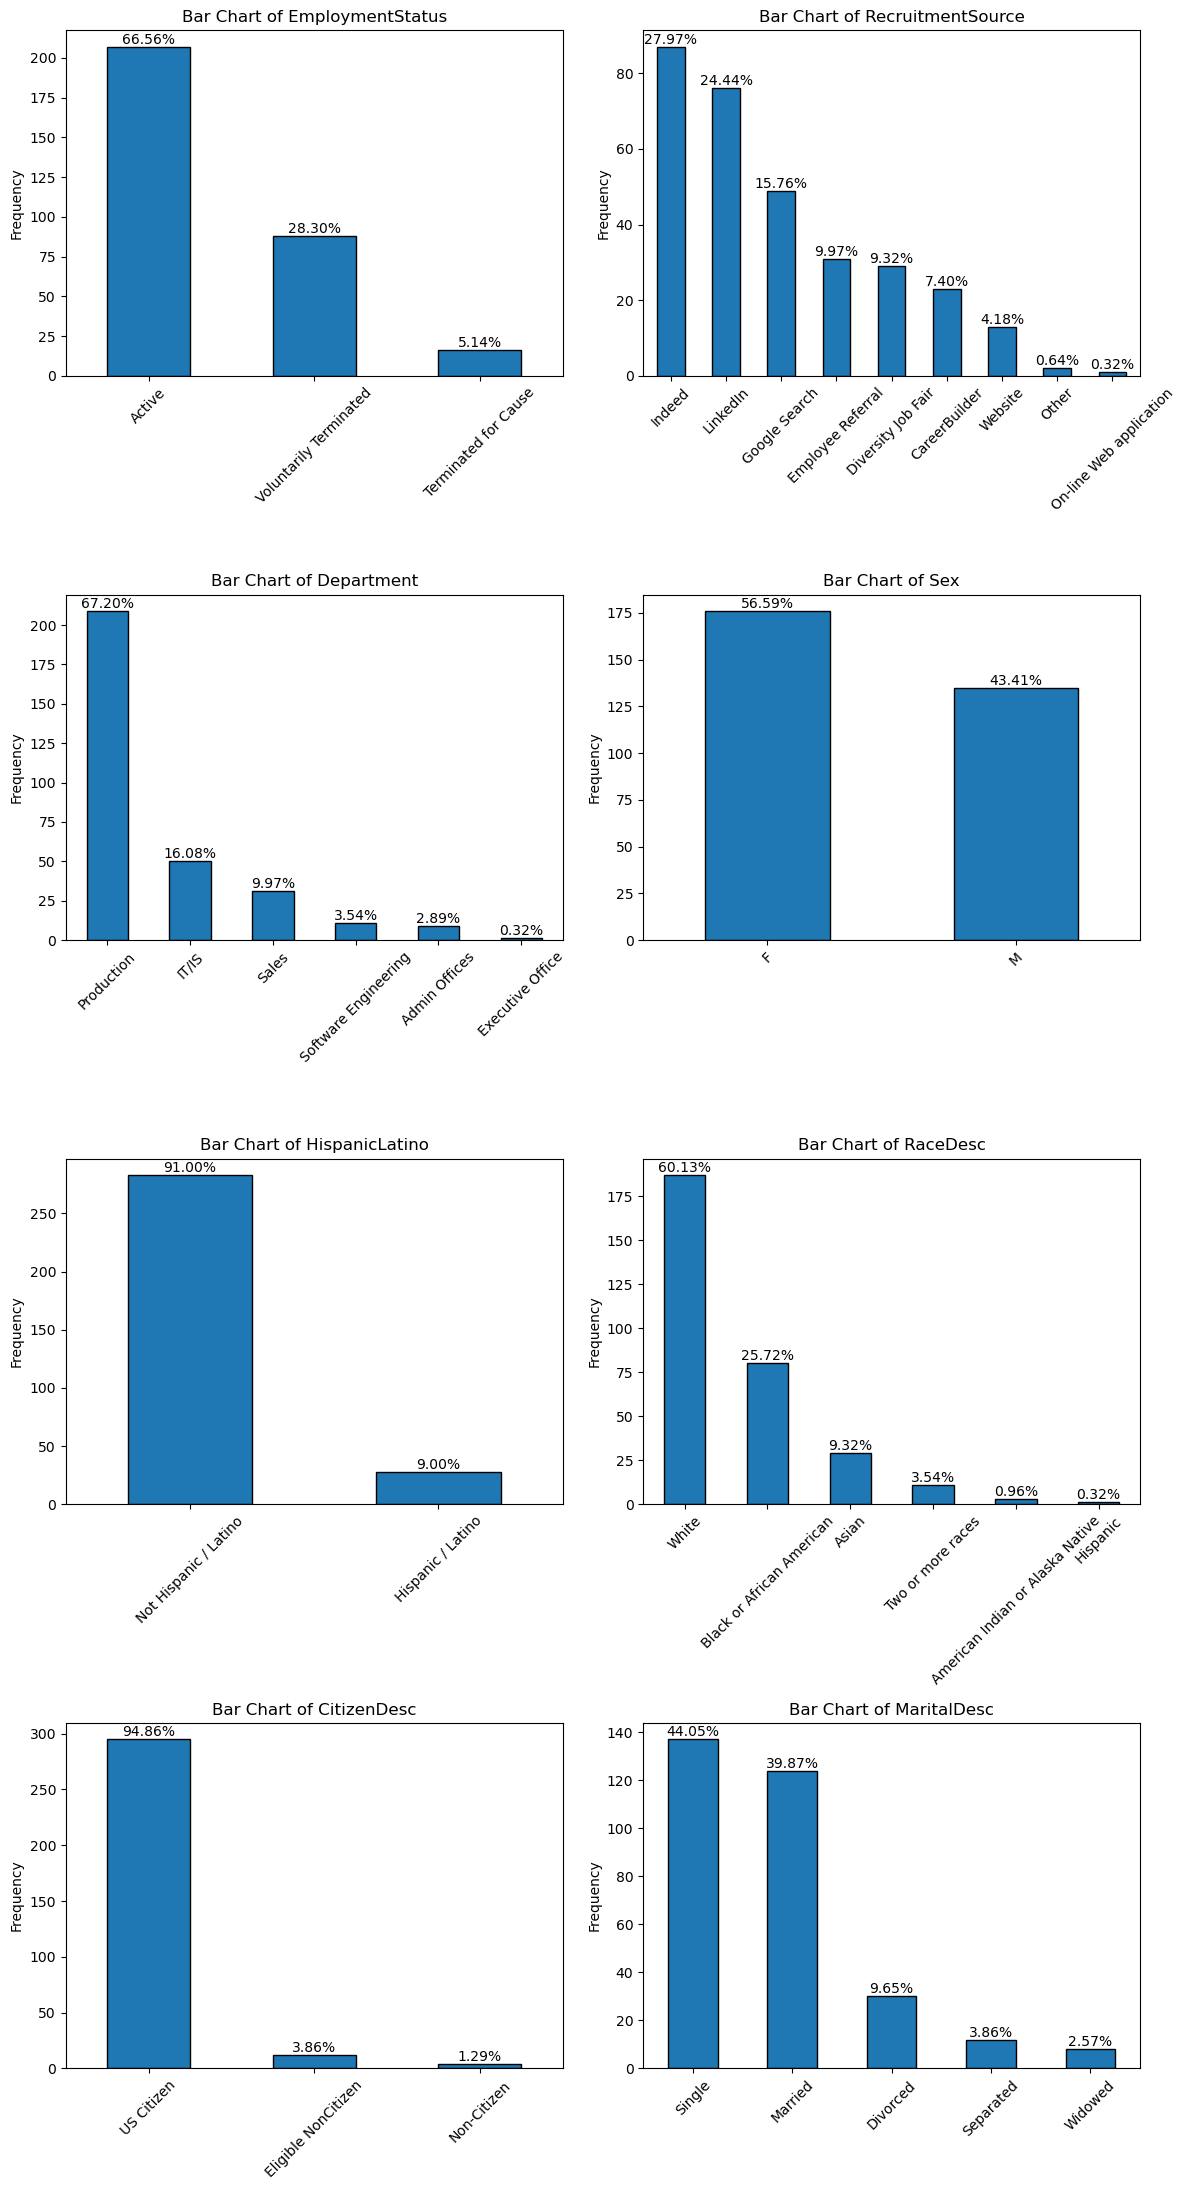

In [27]:
cat_columns_viz = ['EmploymentStatus', 'RecruitmentSource', 'Department', 
                       'Sex', 'HispanicLatino', 'RaceDesc', 'CitizenDesc', 'MaritalDesc']

# Creating a 4x2 grid of subplots, since we are going to make 8 bar charts and we want 2 per row 
fig, axes = plt.subplots(4, 2, figsize=(12, 22))

# Iterating through the list of categorical columns to create a histogram for each one
for i, column in enumerate(cat_columns_viz):
    ax = axes[i // 2, i % 2] 
    
    # Getting the value counts for the current column
    value_counts = data[column].value_counts()

    # Creating the bar chart
    value_counts.plot(kind='bar', ax=ax, edgecolor='k')
    
    # Customizing the visualization
    ax.set_title(f'Bar Chart of {column}')
    ax.set_ylabel('Frequency')
    ax.grid(False)
    ax.tick_params(axis='x', rotation=45)
    
    # Adding percentages above the bars
    total = value_counts.sum()
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{100 * height / total:.2f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

plt.tight_layout()
plt.show()

**Insights:** 

1) About 1/3 of the employees in this dataset left the company. Most employees who left did so voluntarily

2) Indeed and LinkedIn are the most common recruitment sources, accounting for over half of all employees. The company website is one of the least common recruitment sources, accounting for less than 5% of employees

3) The production department is by far the largest department in the company, with about 2/3 of total headcount

4) There are slightly more female employees than male employees

5) About 10% of employees are Hispanic / Latino

6) The most common race among employees is White (60%), followed by Black (25%) and then Asian (10%)

7) The vast majority (95%) of employees are US citizens

8) Most employees (85%) are single or married, with a smaller portion being divorced, separated, or widowed

### Recommendations from EDA 

**From our EDA alone, a number of insights about the company's workforce have revealed themselves, informing the following recommendations:**  

1) The more engaged and satisfied employees are, the higher performing they tend to be. This means that the company should look to promote employee engagement and satisfaction not only to improve employee experience, but also to boost job performances. Importantly, engagement is an even higher priority than satisfaction for this goal since the former is more strongly correlated with performance

2) The company is doing a good job making sure that its employees are engaged at work, but there is substantial room for improvement in terms of employee satisfaction

3) Employees that are late to work more frequently tend to be less engaged, less satisfied, and worse performing. This means that monitoring employees' tardiness could provide insight into their engagement, satisfaction, and job performance without the need for more costly and time-consuming surveys and performance reviews

4) The company website accounts for a very small (< 5%) portion of employee recruitments. The company should investigate whether there are problems with the website that could explain this. For example, the website could be designed in a way that makes it difficult to navigate to the 'Careers' page, or the positions listed on the website could not be up-to-date

5) One of the most common reasons that employees left the company was because they were offered more money elsewhere. There is also a very weak correlation between job performance and salary. The company should thus evaluate whether they are properly compensating their high performing employees so that they don't lose them

# Management Practice Analysis

**An employee's manager can potentially have a big impact on their engagement, satisfaction, and job performance**  

**A valuable question for the company to ask is whether different managers are associated with differences in these KPI's**  

**The results of this analysis could highlight which managers seem to be managing their employees better and inform intervention strategies aimed at improving management practices within the company**

**First I'll create a table that presents the KPI's by manager, then I'll visualize them**

In [28]:
manager_table = data.groupby('ManagerID').agg(
    Name = ('ManagerName', 'first'),
    Department = ('Department', 'first'),
    Average_Engagement = ('EngagementSurvey', lambda x: round(x.mean(), 2)),
    Average_Satisfaction = ('EmpSatisfaction', lambda x: round(x.mean(), 2)),
    Average_Performance = ('PerfScoreID', lambda x: round(x.mean(), 2)),
    Total_Employees = ('EmpID', 'count')
).reset_index()

manager_table = manager_table.set_index("ManagerID")

manager_table.sort_values('Total_Employees', ascending = False)

,Name,Department,Average_Engagement,Average_Satisfaction,Average_Performance,Total_Employees
ManagerID,,,,,,
20,Kissy Sullivan,Production,4.04,3.91,2.95,22
12,Brannon Miller,Production,4.04,3.41,2.82,22
18,Kelley Spirea,Production,4.48,3.82,3.09,22
16,Elijiah Gray,Production,4.07,3.95,3.00,22
39,Webster Butler,Production,4.33,4.05,3.00,21
22,Michael Albert,Production,4.12,4.00,2.86,21
19,Ketsia Liebig,Production,4.05,4.10,3.05,21
11,Amy Dunn,Production,3.92,3.81,2.90,21
14,David Stanley,Production,4.15,3.95,3.00,21


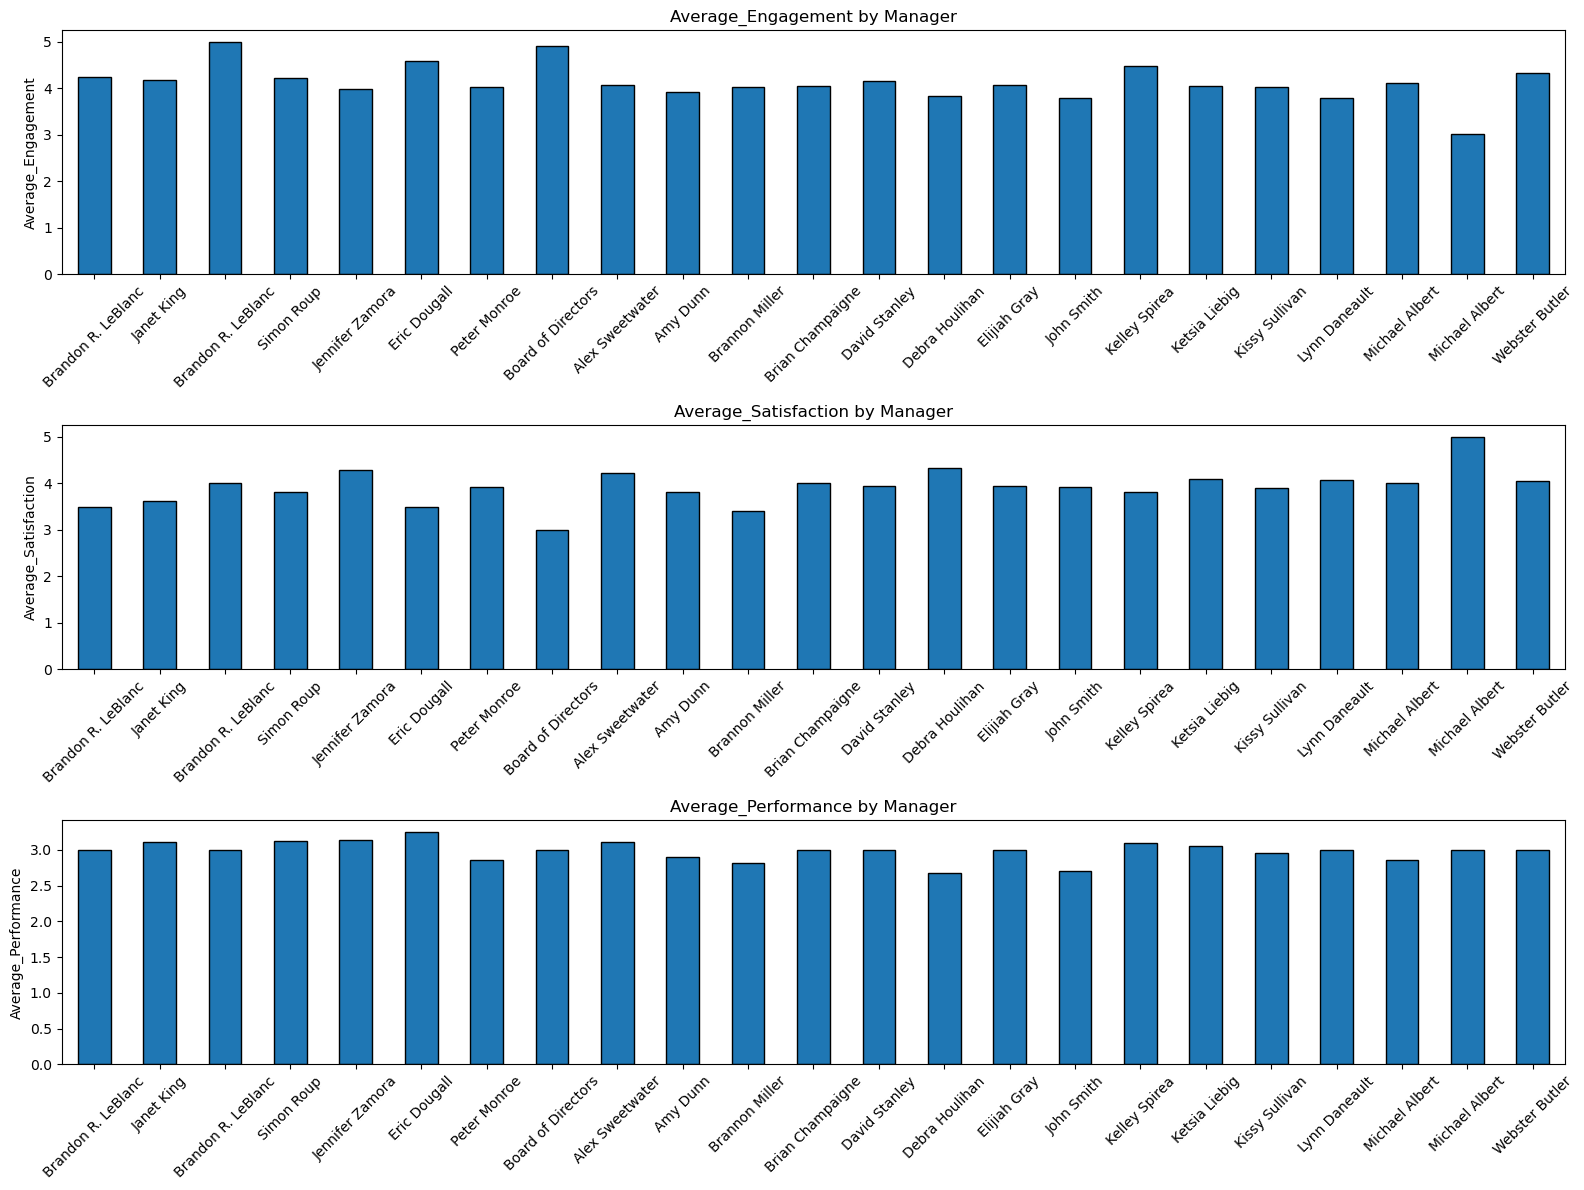

In [29]:
columns_to_plot = ['Average_Engagement', 'Average_Satisfaction', 'Average_Performance']

fig, axes = plt.subplots(3, 1, figsize=(16, 12))

# Iterating through the column list to create a bar chart for each one
for i, column in enumerate(columns_to_plot):
    
    ax = axes[i]
    
    # Creating the bar chart
    manager_table.plot(kind='bar', x='Name', y=column, ax=ax, edgecolor='k', legend=False)
    
    # Customizing the visualization
    ax.set_title(f'{column} by Manager')
    ax.set_xlabel('')
    ax.set_ylabel(column)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

**Now we'll run some ANOVA's on each KPI to determine whether there are statistically significant differences between managers**  

**But before doing that, let's check the assumption of homoscedasticity (equality of variances) so we know which ANOVA test to run**

In [30]:
kpi = ['EmpSatisfaction', 'EngagementSurvey', 'PerfScoreID'] 
    
for kpi in kpi:

    groups = [data[kpi][data['ManagerID'] == group] for group in data['ManagerID'].unique()]

    statistic, p_value = stats.levene(*groups)

    if p_value < 0.05:
        print(f"Assumption of homoscedasticity for '{kpi}' violated")
    else:
        print(f"Assumption of homoscedasticity for '{kpi}' not violated")

Assumption of homoscedasticity for 'EmpSatisfaction' not violated
Assumption of homoscedasticity for 'EngagementSurvey' not violated
Assumption of homoscedasticity for 'PerfScoreID' violated


**So we'll use normal ANOVA's for satisfaction and engagement, and Welch's ANOVA for performance**

### Satisfaction ANOVA

In [31]:
model = ols('EmpSatisfaction ~ ManagerID', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

if anova_table['PR(>F)']['ManagerID'] < .05:
    print("ANOVA suggests significant differences in employee satisfaction between managers")
else:
    print("ANOVA suggests insignificant differences in employee satisfaction between managers")

ANOVA suggests insignificant differences in employee satisfaction between managers


### Engagement ANOVA

In [32]:
model = ols('EngagementSurvey ~ ManagerID', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

if anova_table['PR(>F)']['ManagerID'] < .05:
    print("ANOVA suggests significant differences in employee engagement between managers")
else:
    print("ANOVA suggests insignificant differences in employee engagement between managers")

ANOVA suggests insignificant differences in employee engagement between managers


### Performance ANOVA

In [33]:
welch_result = pg.welch_anova(data=data, dv='PerfScoreID', between='ManagerID')

welch_p = welch_result['p-unc'][0]

if welch_p < .05:
    print("Welch's ANOVA suggests significant differences in employee job performance between managers")
else:
    print("Welch's ANOVA suggests insignificant differences in employee job performance between managers")

Welch's ANOVA suggests insignificant differences in employee job performance between managers


/Users/ajarbuckle/opt/anaconda3/lib/python3.9/site-packages/pingouin/parametric.py:1343: RuntimeWarning: invalid value encountered in double_scalars
  adj_grandmean = (weights * grp.mean()).sum() / weights.sum()


**Our ANOVA's suggested that there are no statistically significant differences in employee engagement, satisfaction, or job performance by manager**  

**This means that we cannot conclude that these KPI's vary by manager**

# Performance Improvement Plan (PIP) Efficacy Analysis  

**In the company's performance evaluations there were four possible scores: 'Exceeds', 'Fully Meets', 'Needs Improvement', and 'PIP'**  

**We can evaluate how effective these PIP's were by comparing the involuntary terminations between employees in the 'Needs Improvement' and 'PIP' categories because both groups were low-performing, but only 'PIP' employees went on PIP's**

**First, let's visualize the involuntary terminations for each group**

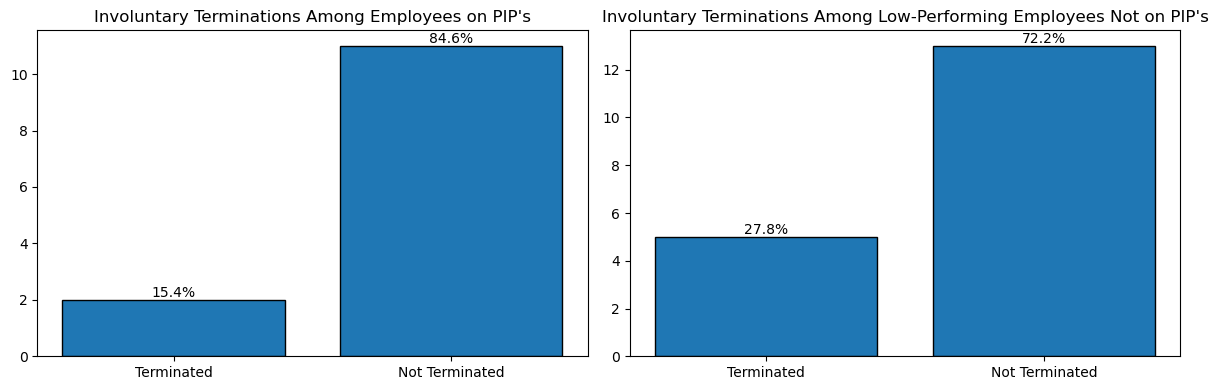

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# First chart

subset_pip = data[data['PerformanceScore'] == 'PIP'].copy()
fired_pip = subset_pip[subset_pip['EmploymentStatus'] == 'Terminated for Cause']
not_fired_pip = subset_pip[subset_pip['EmploymentStatus'] != 'Terminated for Cause']
total_pip = len(fired_pip) + len(not_fired_pip)

axes[0].bar(['Terminated', 'Not Terminated'], [len(fired_pip), len(not_fired_pip)], edgecolor = 'black')
axes[0].set_title("Involuntary Terminations Among Employees on PIP's")

# Adding percentages 
for i, value in enumerate([len(fired_pip), len(not_fired_pip)]):
    percentage = (value / total_pip) * 100
    axes[0].text(i, value, f'{percentage:.1f}%', ha='center', va='bottom')
    
# Second chart 

subset_needs_improvement = data[data['PerformanceScore'] == 'Needs Improvement'].copy()
fired_needs_improvement = subset_needs_improvement[subset_needs_improvement['EmploymentStatus'] == 'Terminated for Cause']
not_fired_needs_improvement = subset_needs_improvement[subset_needs_improvement['EmploymentStatus'] != 'Terminated for Cause']
total_needs_improvement = len(fired_needs_improvement) + len(not_fired_needs_improvement)

axes[1].bar(['Terminated', 'Not Terminated'], [len(fired_needs_improvement), len(not_fired_needs_improvement)], edgecolor = 'black')
axes[1].set_title("Involuntary Terminations Among Low-Performing Employees Not on PIP's")

# Adding percentages 
for i, value in enumerate([len(fired_needs_improvement), len(not_fired_needs_improvement)]):
    percentage = (value / total_needs_improvement) * 100
    axes[1].text(i, value, f'{percentage:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

**There was a higher rate of involuntary termination among employees whose performance score was 'Needs Improvement' compared to 'PIP', even though the 'PIP' score is a lower performance score**  

**This looks like support for PIP's being effective at improving employee performance**  

**However, to truly assess the efficacy of the PIP's, we need to run a chi-square test** 

In [35]:
# Creating a contingency table 
contingency = [[len(fired_pip), len(not_fired_pip)], [len(fired_needs_improvement), len(not_fired_needs_improvement)]]

chi2, p, _, _ = stats.chi2_contingency(contingency)

if p < .05:
    print("There is a statistically significant association between the performance groups and involuntary terminations")
else:
    print("There is no statistically significant association between the performance groups and involuntary terminations")

There is no statistically significant association between the performance groups and involuntary terminations


**Because our chi-square test came back insignificant, we do not have enough evidence that the PIP's improve performance beyond the level of those in the 'Needs Improvement' category despite the inital promising evidence** 

**This could be due to the fact that our sample size for both groups was very small**

**Regardless, the company should continue to invest in PIP's and monitor outcomes**

# Diversity and Equity Analysis

### The first task in this analysis is to create an overall diversity profile for the company

**This can be accomplished through some of the visualizations in the EDA section, which show us the distribution of employees by various identity groups**

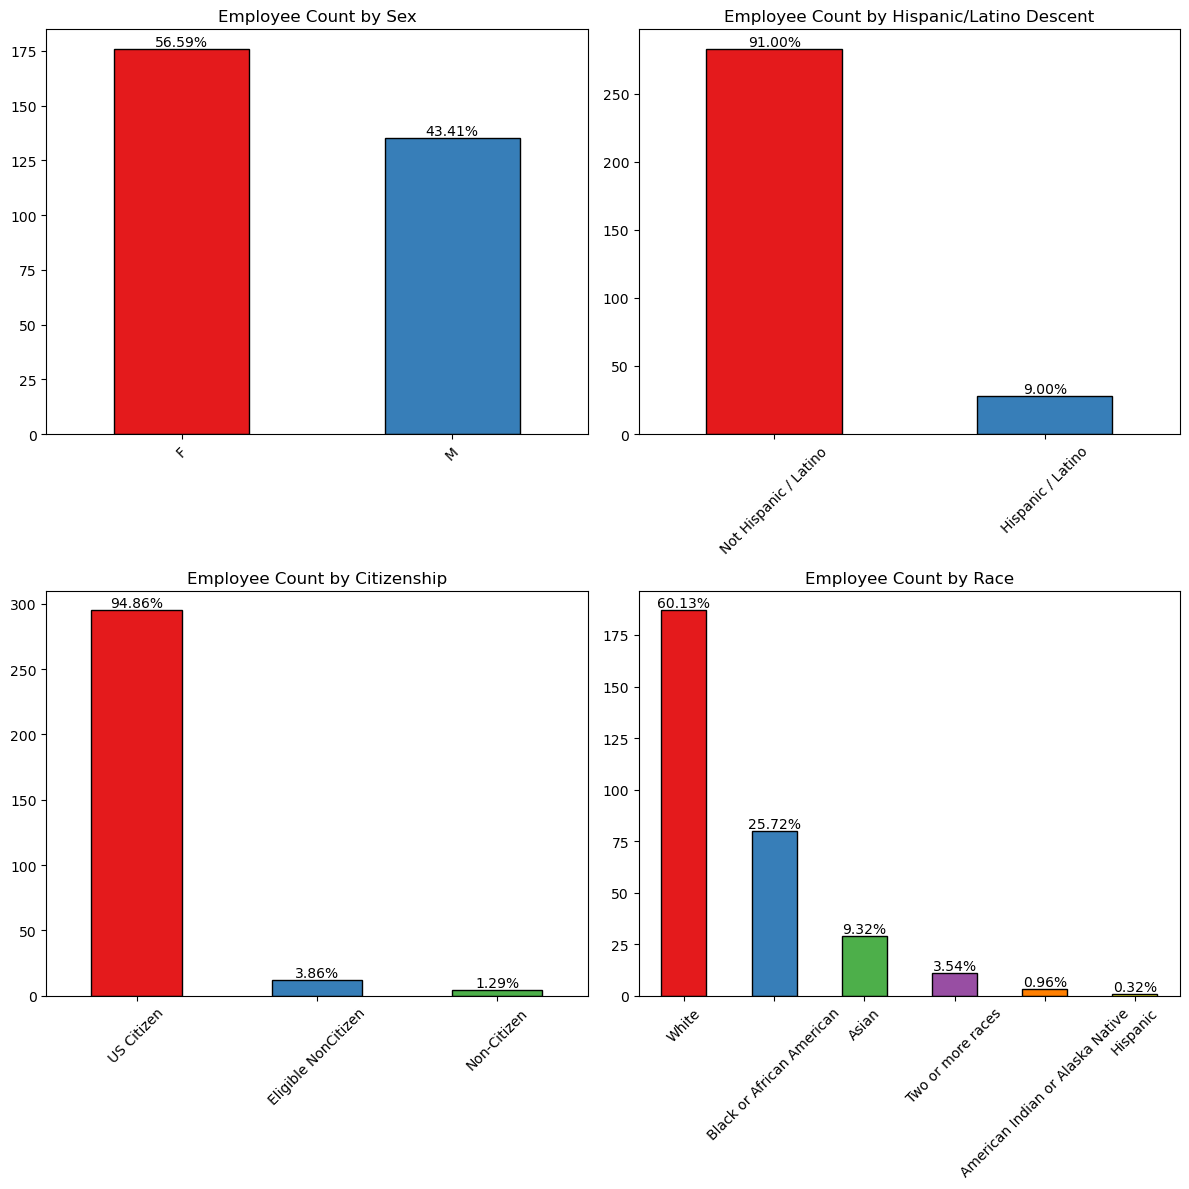

In [36]:
diversity_features = ['Sex', 'HispanicLatino', 'CitizenDesc', 'RaceDesc']

# Creating a dictionary so that I can replace the column name with a name that looks better on the bar charts
diversity_feature_mapping = {
    'Sex': 'Sex',
    'HispanicLatino': 'Hispanic/Latino Descent',
    'CitizenDesc': 'Citizenship',
    'RaceDesc': 'Race',
}

fig, axes = plt.subplots(2, 2, figsize=(12, 12)) 

axes = axes.flatten()

colors = sns.color_palette("Set1")

# Iterating through the diversity columns list to create bar charts for each one
for i, feature in enumerate(diversity_features):
    ax = axes[i]
    
    # Getting the value counts for the current column
    value_counts = data[feature].value_counts()
    
    # Creating the bar chart 
    value_counts.plot(kind='bar', edgecolor='k', ax=ax, color = colors)
    
    # Using the dictionary I created to make the chart titles look nicer
    custom_feature_name = diversity_feature_mapping.get(feature, feature)
    ax.set_title(f'Employee Count by {custom_feature_name}')
    
    # Customizing the visualization
    ax.tick_params(axis='x', rotation=45)
    
    # Adding percentages above the bars
    total = value_counts.sum()
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{100 * height / total:.2f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')


plt.tight_layout()
plt.show()

### Next, we want to know what the best recruitment sources are for promoting diversity

**I'll create a table that shows the percentage of employees in various identity groups for the whole company, as well as for various recruitment sources**

**This will give us insight into which recruitment sources are promoting diversity above and below company benchmarks**

In [37]:
# Getting diversity statistics for the company as a whole
total_employees = data['EmpID'].count()
percent_non_white = round((data['RaceDesc'] != 'White').mean() * 100, 2)
percent_female = round((data['Sex'] == 'F').mean() * 100, 2)
percent_non_us_citizen = round((data['CitizenDesc'] != 'US Citizen').mean() * 100, 2)
percent_hispanic_latino_ethnicity = round((data['HispanicLatino'] == 'Hispanic / Latino').mean() * 100, 2)

# Putting the company-wide diversity statistics into a dataframe 
overall_stats = pd.DataFrame({
    'RecruitmentSource': 'ALL',
    'TotalEmployees': [total_employees],
    'PercentNonWhite': [percent_non_white],
    'PercentFemale': [percent_female],
    'PercentNonUSCitizen': [percent_non_us_citizen],
    'PercentHispanicLatinoEthnicity': [percent_hispanic_latino_ethnicity]
})

# Creating a dataframe with diversity statistics by recruitment source
diversity_table = data.groupby('RecruitmentSource').agg(
    TotalEmployees = ('EmpID', 'count'),
    PercentNonWhite = ('RaceDesc', lambda x: round((x != 'White').mean() * 100, 2)),
    PercentFemale = ('Sex', lambda x: round((x == 'F').mean() * 100, 2)),
        PercentHispanicLatinoEthnicity = ('HispanicLatino', lambda x: round((x == 'Hispanic / Latino').mean() * 100, 2)),
    PercentNonUSCitizen = ('CitizenDesc', lambda x: round((x != 'US Citizen').mean() * 100, 2))
).reset_index()

# Putting the two dataframes together 
diversity_table = pd.concat([diversity_table, overall_stats], ignore_index=True)

diversity_table.set_index('RecruitmentSource', inplace=True)

diversity_table.sort_values('TotalEmployees', ascending = False)

,TotalEmployees,PercentNonWhite,PercentFemale,PercentHispanicLatinoEthnicity,PercentNonUSCitizen
RecruitmentSource,,,,,
ALL,311,39.87,56.59,9.00,5.14
Indeed,87,37.93,57.47,6.90,3.45
LinkedIn,76,38.16,57.89,7.89,2.63
Google Search,49,28.57,67.35,8.16,8.16
Employee Referral,31,19.35,35.48,9.68,6.45
Diversity Job Fair,29,100.00,51.72,24.14,13.79
CareerBuilder,23,30.43,69.57,4.35,0.00
Website,13,46.15,46.15,7.69,7.69
Other,2,0.00,50.00,0.00,0.00


**Recruitment sources that promote diversity:**  
* **Diversity job fair**: this appears to be the best recruitment source overall for promoting diversity, as it ranks first for employees who are non-White, of Hispanic / Latino descent, and non-US citizens
* **Google search**: top recruitment source for female employees
* **CareerBuilder**: top recruitment source for female employees
* **Company website**: the only recruitment source asides from the diversity job fair to hire a greater percentage of non-White employees than the company-wide average

**Recruitment sources that maintain existing diversity levels:**
* **Indeed**: roughly equal percentage of employees who are non-White, Female, of Hispanic / Latino descent, and non-US citizens hired this way as company-wide average
* **LinkedIn**: roughly equal percentage of employees who are non-White, Female, of Hispanic / Latino descent, and non-US citizens hired this way as company-wide average

**Recruitment sources that inhibit diversity:**
* **Employee referrals**: the percentage of non-White and Female employees recruited this way is substantially lower than the company-wide average

**Recruitment sources for which there is insufficient data to draw conclusions:**
* **On-line web application**: only one employee recruited this way 
* **Other**: only two employees recruited this way 

### Lastly, we'd like to investigate whether there are pay inequities in the company

**To answer this question, I will conduct a multiple regression analysis. This means building a multiple regression model (using the entire dataset as opposed to splitting it into training and testing portions, as the goal is not to predict salary) and analyzing the coefficient values for each variable (such as race) to see if they impact salary while controlling for other variables (like position and department)**

In [38]:
# Labeling feature and target columns
X = data[['PerfScoreID', 'Position', 'Department', 'RaceDesc', 'Sex', 'HispanicLatino', 'CitizenDesc']]
y = data['Salary']

# Reordering identity columns to make the comparison group first so that our model compares all other groups to it (because of the drop_first = True parameter in 
# the one-hot encoding)

category_order = ['White', 'Black or African American', 'Asian', 'Two or more Races', 'American Indian or Alaska Native', 'Hispanic']
X['RaceDesc'] = X['RaceDesc'].astype(pd.CategoricalDtype(categories=category_order, ordered=True))

category_order = ['M', 'F']
X['Sex'] = X['Sex'].astype(pd.CategoricalDtype(categories=category_order, ordered=True))

category_order = ['Not Hispanic / Latino', 'Hispanic / Latino']
X['HispanicLatino'] = X['HispanicLatino'].astype(pd.CategoricalDtype(categories=category_order, ordered=True))

category_order = ['US Citizen', 'Eligible NonCitizen', 'Non_Citizen']
X['CitizenDesc'] = X['CitizenDesc'].astype(pd.CategoricalDtype(categories=category_order, ordered=True))

# Encoding identity group features 
X = pd.get_dummies(X, columns=['RaceDesc', 'Sex', 'HispanicLatino', 'CitizenDesc'], drop_first = True)

# Encoding control features 
X = pd.get_dummies(X, columns=['Position', 'Department'])

# Adding constant term 
X = sm.add_constant(X)

# Fitting the model 
model = sm.OLS(y, X).fit()

# Printing the results 
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     125.6
Date:                Wed, 08 Nov 2023   Prob (F-statistic):          1.60e-150
Time:                        17:21:22   Log-Likelihood:                -3138.0
No. Observations:                 311   AIC:                             6354.
Df Residuals:                     272   BIC:                             6500.
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

**Race**:
* All race categories except 'Two or More Races' had insignificant p-values, and the coefficient for 'Two or More Races' was very close to 0. This means that an employee's race is not associated with their salary in a statistically significant way 

**Sex**:
* The female cateogry had an insignificant p-value, meaning that an employee's sex is not associated with their salary in a statistically significant way 

**Hispanic / Latino Descent**: 
* The Hispanic / Latino category had an insignificant p-value, meaning that an employee being Hispanic / Latino is not associated with their salary in a statistically significant way 

**Citizenship**:
* The eligible non-citizen category had an insignificant p-value, and the non-citizen category had a coefficient very close to 0. This means that an employee's US Citizenship status is not associated with their salary in a statistically significant way

**Conclusion**:  

**None of the identity features in the regression analysis were meaningfully associated with a salary in a statistically significant way, which means that employee compensation is equitable between all the identity groups included in this analysis** 

**Interestingly, one of the features included in the analysis as a control factor, performance score, was not associated with salary in a statistically significant way. Given that money is one of the top reasons why employees choose to leave the company, the company should re-evaluate its compensation model so that it doesn't lose its high performing employees**